In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from seaborn import heatmap
from seaborn import countplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv', sep = ',')
df

,Matrikkel / Org-Anr,Address,Housing type,Primary room,Usable area,Gross area,Year of construction,Floor,Plot size,Last sold,...,Lon,Year,Month,Day,Policy rate,CPI,Change CPI,HPI Norway,HPI Trondheim,Borrowing rate%
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007.0,0,970.8,2021-02-28,...,10.4927,2021,2,28,0.0,115.3,0.7,130.7,123.5,1.77
1,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004.0,7,1043.2,2021-03-01,...,10.4134,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
2,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,144,2019.0,5,3673.0,2021-03-01,...,10.3973,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,73,2019.0,5,4572.6,2021-03-01,...,10.4535,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
4,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995.0,3,9300.8,2021-03-01,...,10.4113,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,5001-408/99/0/8,"Brinken 9, 7016 TRONDHEIM",Selveierleilighet,92,93,93,1912.0,5,538.3,2024-02-28,...,10.4051,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20080,977248744/16,"Anton Bergs veg 4 A, 7099 FLATÅSEN",Borettslagsleilighet,111,122,130,1998.0,1,8100.0,2024-02-28,...,10.3505,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20081,5001-95/128/0/0,"Gamle Åsvei 61, 7020 TRONDHEIM",Selveier enebolig,175,242,0,1925.0,0,801.0,2024-02-28,...,10.3541,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20082,5001-411/201/0/48,"Anders Buens gate 19, 7067 TRONDHEIM",Selveierleilighet,46,54,54,1939.0,4,1533.2,2024-02-28,...,10.4277,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56


In [3]:
df.columns

Index(['Matrikkel / Org-Anr', 'Address', 'Housing type', 'Primary room',
       'Usable area', 'Gross area', 'Year of construction', 'Floor',
       'Plot size', 'Last sold', 'Price', 'Joint debt at last sale',
       'Total price at last sale', 'Number of rooms', 'Number of bedrooms',
       'Registered date', 'Turnover rate', 'Broker', 'Postal code',
       'Broker encoded', 'Housing type encoded', 'Balcony_Yes', 'Parking_Yes',
       'Lat', 'Lon', 'Year', 'Month', 'Day', 'Policy rate', 'CPI',
       'Change CPI', 'HPI Norway', 'HPI Trondheim', 'Borrowing rate%'],
      dtype='object')

In [4]:
X = df.select_dtypes(include = ['int','float']).drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
model_1 = RandomForestRegressor(random_state=42)
model_1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

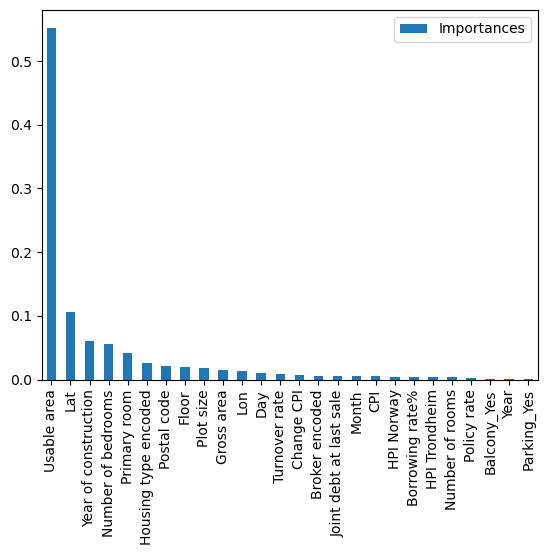

In [9]:

importances = pd.DataFrame(model_1.feature_importances_, columns = ['Importances'],
                                                        index = X_train.columns)
importances.sort_values(by = ['Importances'], axis = 0, ascending = False, inplace = True)

importances.plot(kind = 'bar')
plt.show()


In [10]:
fimp = pd.DataFrame({'Columns' : X_train.columns, 'Importance': model_1.feature_importances_})
fimp = fimp.sort_values(by = 'Importance', ascending = False)
fimp

,Columns,Importance
1,Usable area,0.552603
15,Lat,0.105506
3,Year of construction,0.059918
8,Number of bedrooms,0.055243
0,Primary room,0.042056
12,Housing type encoded,0.025376
10,Postal code,0.020689
4,Floor,0.020204
5,Plot size,0.018359
2,Gross area,0.014516


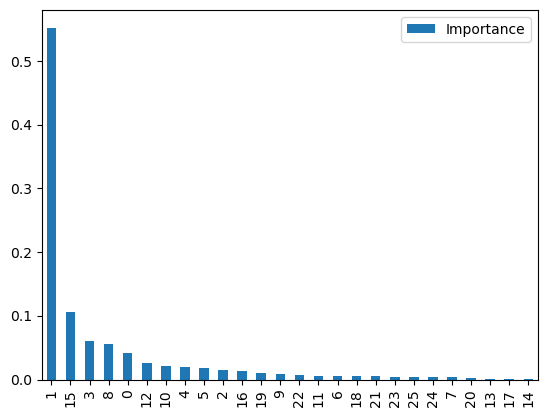

In [11]:

fimp.plot(kind = 'bar')
plt.show()

In [12]:
fimp['Importance'].sum()

0.9999999999999997

In [13]:
y_fit1 = model_1.predict(X_train)
y_pred1 = model_1.predict(X_test)

In [14]:
print(model_1.score(X_train, y_train))
print(model_1.score(X_test, y_test))

0.9775727821842146
0.8649748362021595


In [15]:
from sklearn.metrics import mean_absolute_error as MAE 

In [16]:
print('MAE on train', MAE(y_train, y_fit1))
print('MAE on test', MAE(y_test, y_pred1))

MAE on train 158089.63826251822
MAE on test 417492.36576843436


In [17]:
print('test ME', np.mean(y_pred1 - y_test))

test ME 8313.342723991189


In [18]:
#We need to prune this model!!

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters found by Grid Search
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 574423976420.3883


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_train_pred contains the predicted values for the training set
y_train_pred = best_model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r_squared = r2_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("R-squared (R2) Score:", train_r_squared)

# Assuming y_test_pred contains the predicted values for the test set
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r_squared = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("R-squared (R2) Score:", test_r_squared)


Training Set Metrics:
Mean Squared Error (MSE): 92704490589.49054
Mean Absolute Error (MAE): 156908.86193100867
R-squared (R2) Score: 0.9778720170892278

Test Set Metrics:
Mean Squared Error (MSE): 574423976420.3883
Mean Absolute Error (MAE): 413820.49729645567
R-squared (R2) Score: 0.8676801883365008


In [35]:
# Adjust hyperparameters to prune the model further
pruned_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)

# Train the pruned model
pruned_model.fit(X_train, y_train)

# Evaluate the pruned model on the test set
y_pred_pruned = pruned_model.predict(X_test)
pruned_mse = mean_squared_error(y_test, y_pred_pruned)
pruned_r_squared = r2_score(y_test, y_pred_pruned)

print("Pruned Model Metrics:")
print("Mean Squared Error (MSE):", pruned_mse)
print("R-squared (R2) Score:", pruned_r_squared)


Pruned Model Metrics:
Mean Squared Error (MSE): 768882709662.9203
R-squared (R2) Score: 0.8228861964155515


In [36]:
# Calculate R-squared on the training set for the pruned model
y_train_pred_pruned = pruned_model.predict(X_train)
train_r_squared_pruned = r2_score(y_train, y_train_pred_pruned)

print("R-squared (R2) Score on Training Set (after pruning):", train_r_squared_pruned)

# Calculate R-squared on the test set for the pruned model
y_test_pred_pruned = pruned_model.predict(X_test)
test_r_squared_pruned = r2_score(y_test, y_test_pred_pruned)

print("R-squared (R2) Score on Test Set (after pruning):", test_r_squared_pruned)

R-squared (R2) Score on Training Set (after pruning): 0.8875323499636403
R-squared (R2) Score on Test Set (after pruning): 0.8228861964155515


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grow individual decision trees using cost complexity pruning
ccp_alphas = np.arange(1000000, 100000000, 500000)  # Define a range of alpha values
pruned_trees = []

for ccp_alpha in ccp_alphas:
    # Grow a decision tree with the specified ccp_alpha
    tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X_train, y_train)
    pruned_trees.append(tree)

# Train a Random Forest using the pruned decision trees
pruned_forest = RandomForestRegressor(n_estimators=len(pruned_trees), random_state=42)

# Fit the pruned decision trees to the Random Forest
for tree in pruned_trees:
    pruned_forest.fit(X_train, y_train)

# Calculate R-squared on the training set for the pruned Random Forest
y_train_pred_pruned = pruned_forest.predict(X_train)
train_r_squared_pruned = r2_score(y_train, y_train_pred_pruned)
print("R-squared (R2) Score on Training Set (after pruning):", train_r_squared_pruned)

# Calculate R-squared on the test set for the pruned Random Forest
y_test_pred_pruned = pruned_forest.predict(X_test)
test_r_squared_pruned = r2_score(y_test, y_test_pred_pruned)
print("R-squared (R2) Score on Test Set (after pruning):", test_r_squared_pruned)


R-squared (R2) Score on Training Set (after pruning): 0.9780951093992871
R-squared (R2) Score on Test Set (after pruning): 0.8694620571250707


**This is a copy of the DTR cost Complexity pruning**


In [22]:
model_2 = RandomForestRegressor(random_state = 42)

#Begin cost complexity pruning path 
path = model_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

AttributeError: 'RandomForestRegressor' object has no attribute 'cost_complexity_pruning_path'

In [20]:
pd.Series(ccp_alphas).plot()
plt.show()
#Antall alphas på 12000

NameError: name 'ccp_alphas' is not defined

In [21]:
len(ccp_alphas)

NameError: name 'ccp_alphas' is not defined

In [22]:
ccp_alphas = ccp_alphas[11000:]

In [23]:
len(ccp_alphas)

858

In [24]:
model_list = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha = alpha, random_state = 42)
    model.fit(X_train, y_train)
    model_list.append(model)

In [25]:
train_scores = [model.score(X_train, y_train) for model in model_list]
test_scores = [model.score(X_test, y_test) for model in model_list]

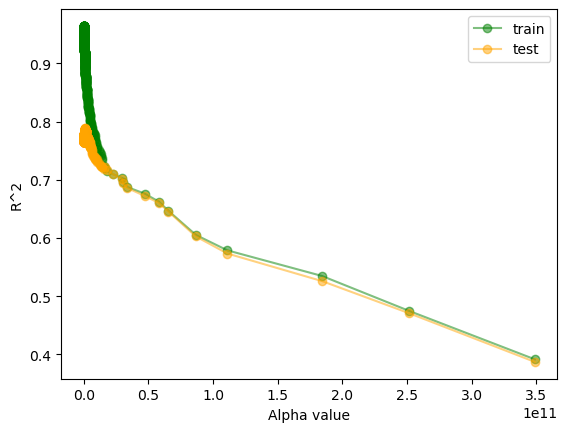

In [26]:
# Plot the scores for both the train and test set
# based on alpha values
plt.plot(ccp_alphas, train_scores, marker='o', alpha=.5, label='train', color='green')
plt.plot(ccp_alphas, test_scores, marker='o', alpha=.5, label='test', color='orange')
plt.xlabel('Alpha value')
plt.ylabel('R^2') # R^2 used for regression problems, mean accuracy for classificat
plt.legend()
plt.show()

In [27]:
# Use cross validation to find the best alpha value
from sklearn.model_selection import cross_val_score
alpha_loop_values = []
for alpha in ccp_alphas:

    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5)

    alpha_loop_values.append([alpha, np.mean(scores), np.std(scores)])

In [28]:
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns = ['Alpha', 'Mean_Accuracy', 'StDev_Accuracy'])
alpha_results.head(3)

,Alpha,Mean_Accuracy,StDev_Accuracy
0,1.529557e+08,0.694980,0.037502
1,1.532736e+08,0.694943,0.037460
2,1.539252e+08,0.695238,0.037603


In [29]:
alpha_results.shape

(858, 3)

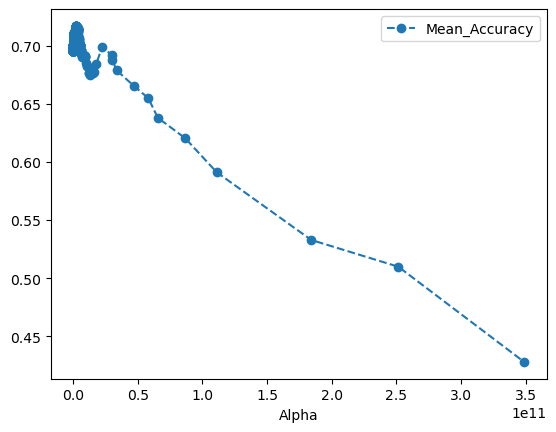

In [30]:
alpha_results.plot(x='Alpha', y='Mean_Accuracy',
 marker = 'o', linestyle = '--')
plt.show()

In [32]:
ideal_alpha = alpha_results[alpha_results['Mean_Accuracy'] 
                            == max(alpha_results['Mean_Accuracy'])].Alpha 
ideal_alpha = float(ideal_alpha)

In [33]:
model_pruned = DecisionTreeRegressor(ccp_alpha = ideal_alpha, 
                                     random_state = 42)
model_pruned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=2204920087.4606, random_state=42)

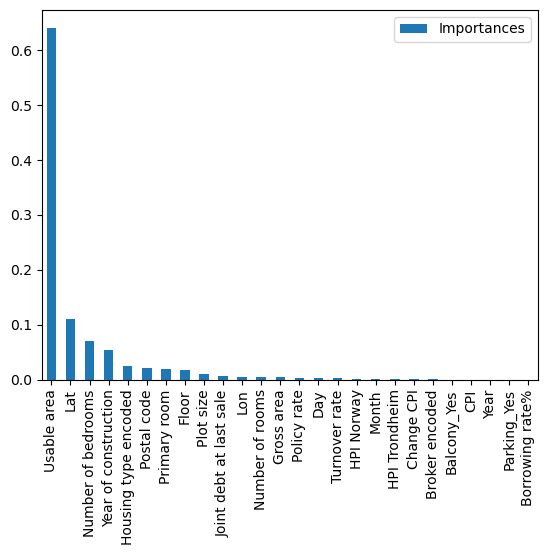

In [34]:
i = pd.DataFrame(model_pruned.feature_importances_, columns = ['Importances'],
                                                        index = X_train.columns)
i.sort_values(by = ['Importances'], axis = 0, ascending = False, inplace = True)

i.plot(kind = 'bar')
plt.show()

In [35]:
y_fit2 = model_pruned.predict(X_train)
y_pred2 = model_pruned.predict(X_test)

In [36]:
print('MAE on train:', MAE(y_train, y_fit2))
print('MAE on test:', MAE(y_test, y_pred2))

MAE on train: 536847.5459708185
MAE on test: 611478.2023670289


In [37]:
from sklearn.tree import plot_tree

In [38]:
X_names = X.columns.to_list()
X_names

['Primary room',
 'Usable area',
 'Gross area',
 'Year of construction',
 'Floor',
 'Plot size',
 'Joint debt at last sale',
 'Number of rooms',
 'Number of bedrooms',
 'Turnover rate',
 'Postal code',
 'Broker encoded',
 'Housing type encoded',
 'Balcony_Yes',
 'Parking_Yes',
 'Lat',
 'Lon',
 'Year',
 'Month',
 'Day',
 'Policy rate',
 'CPI',
 'Change CPI',
 'HPI Norway',
 'HPI Trondheim',
 'Borrowing rate%']

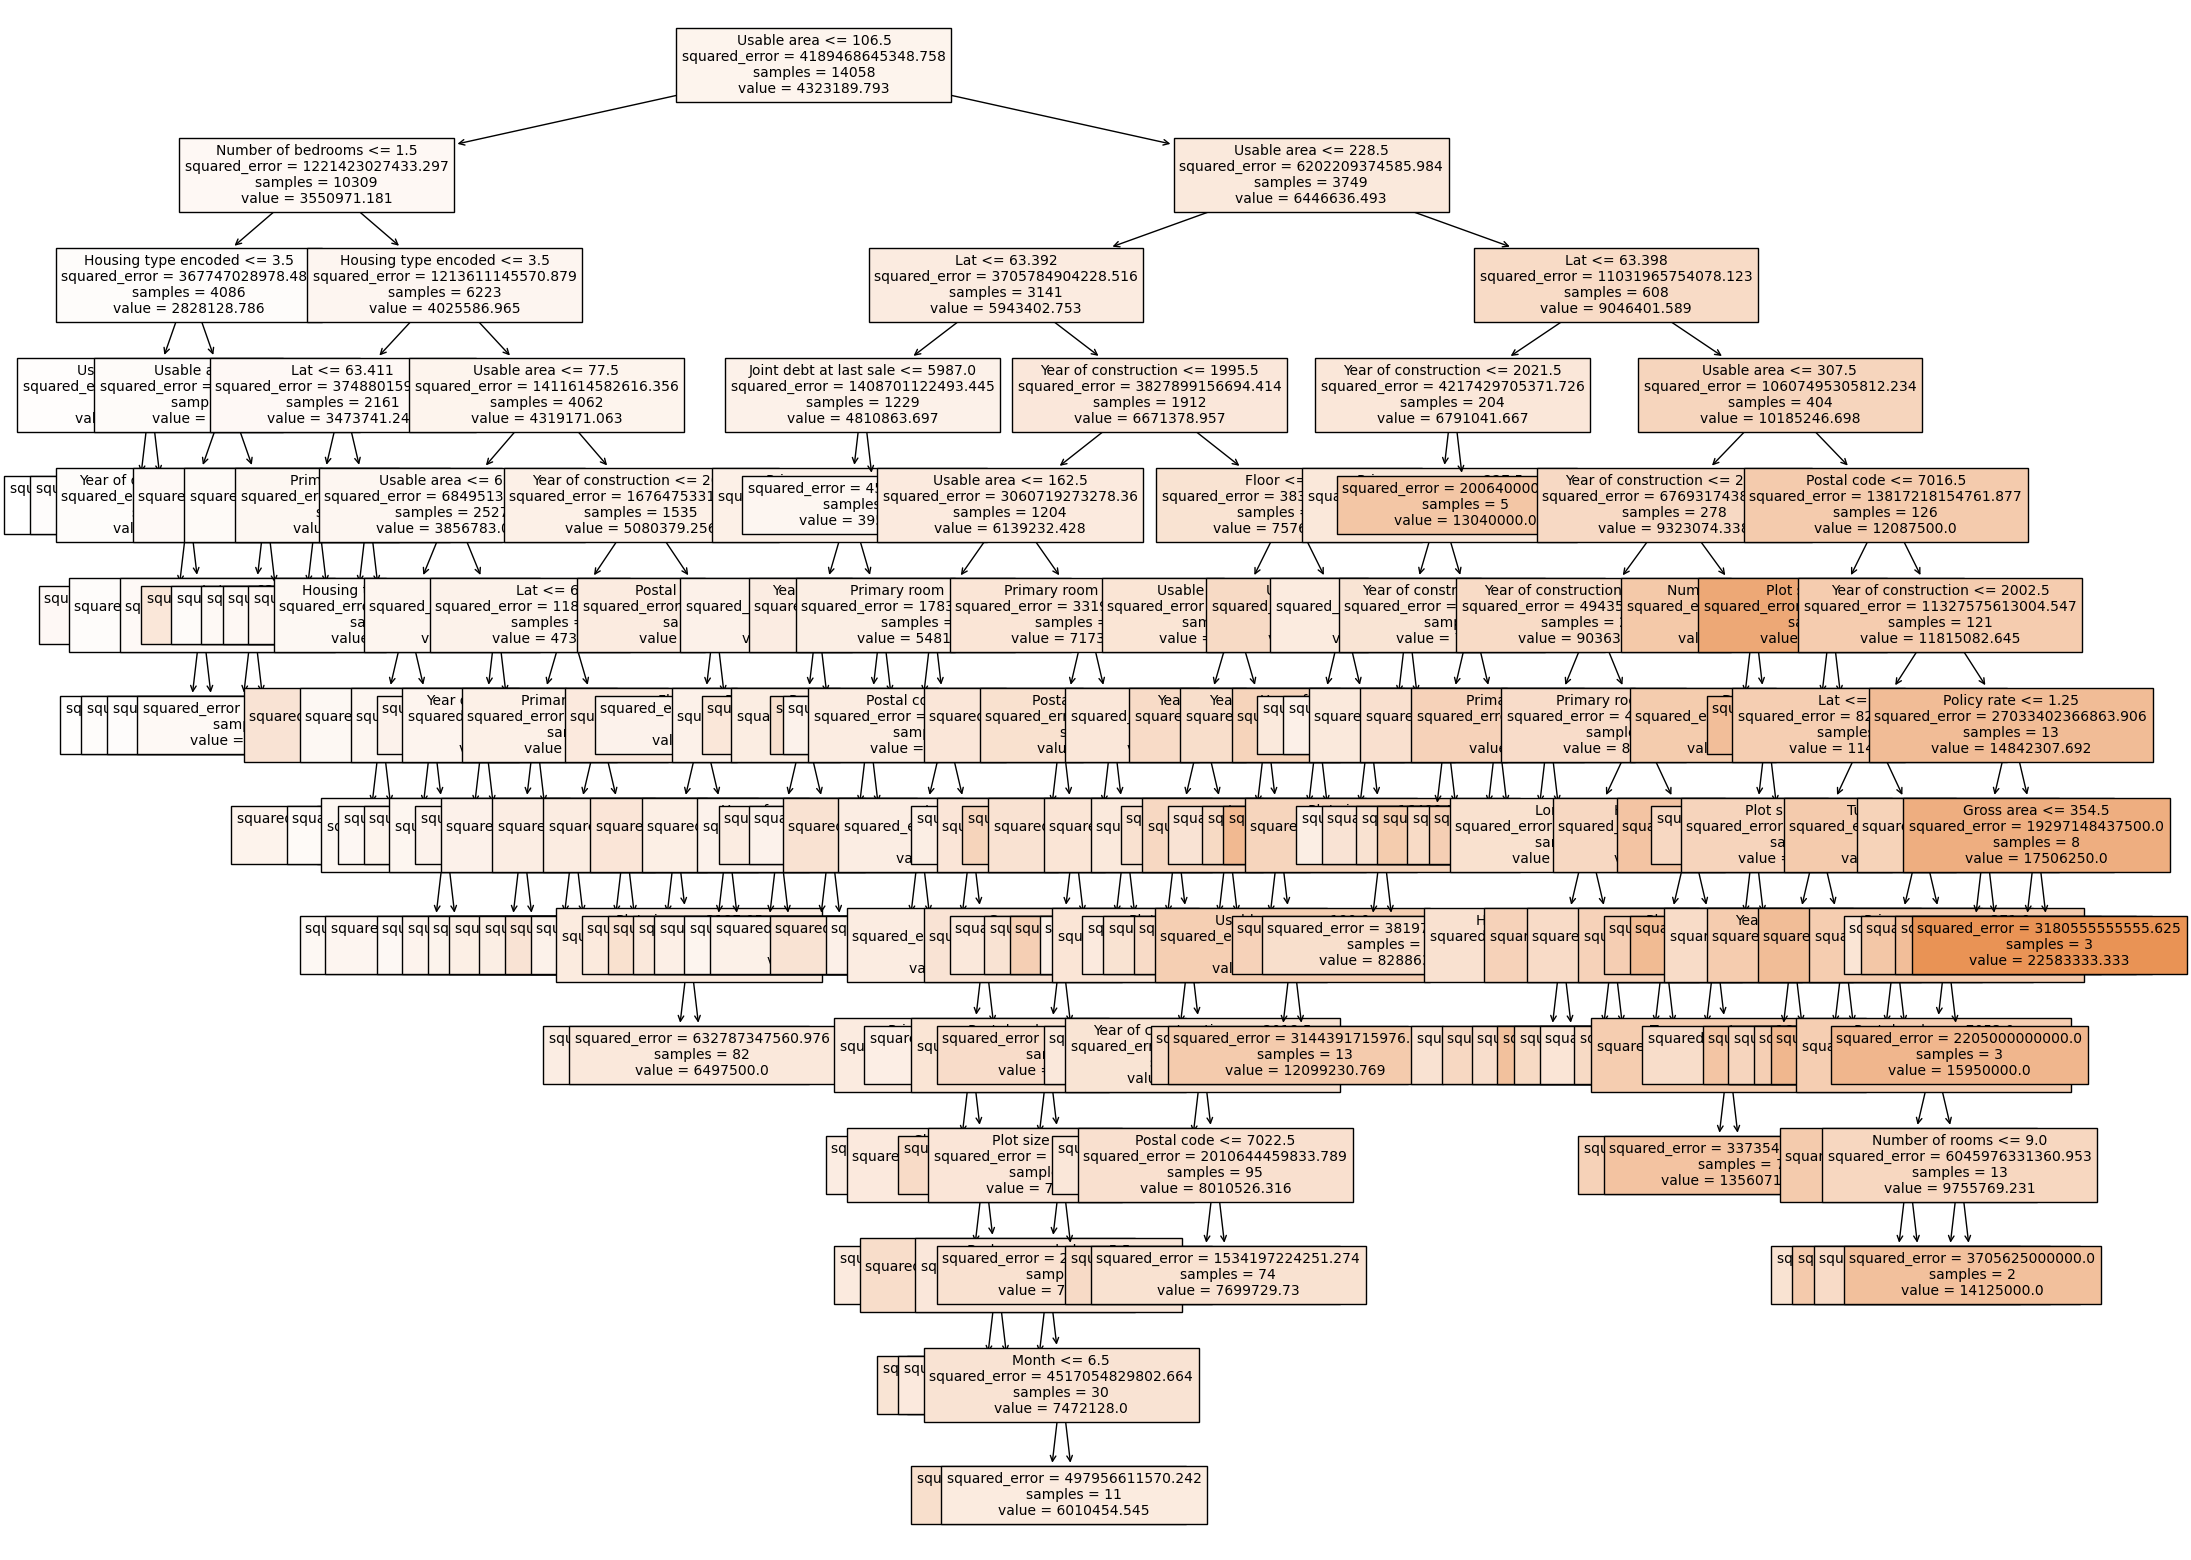

In [39]:
fig = plt.figure(figsize=(25,20))
plot_tree(model_pruned, feature_names = X_names, filled = True, fontsize = 10)
plt.show()

In [40]:
print('Test ME:', np.mean((y_pred2-y_test))) #mean error
# if positive the model is predicting higher values. 

Test ME: -15281.088002307923


In [41]:
print(model_pruned.score(X_train, y_train))
print(model_pruned.score(X_test, y_test))

0.8536299993474362
0.7689096733627647
